# Part II - Ford Bike Trip Data 
## by Ibrahim Risikat

## Investigation Overview


> To get an insight for the analysis, the different data provided was analysed. Quantitative and categorical data to we use to create insight for the analysis. From the charts, It could be seen that most of the bike trips lasts for about 4 to 18 minutes. There are not a lot of bike trips that lasted less than 3 minutes and over 40 minutes. Ford Bike service is mostly used on Wednesday with over 25,000 users. The usage decreases on the weekends and no ride on Sunday. Most of the trips are done by subscribers. The Male gender take the bike more than female gender with over 80,000 males using the service. The Males having a shorted trip than the female and other gender.From the charts, We it was discovered that majority of people that take the bike trip are between 29 and 39years.
It can be deduced that Customers have more ride duration than subscribers. Subcribers are much younger than the customers. It was discovered that the younger age group didnt share their ride but the higher age group shared their ride. Comparing the gender types as it relates to trip duration, the age 20 to 40 represents the group have the most ride. The hour of the day and the day of the week became clearer in this findings. Most subcribers do have most of their ride during the week than weekend. While for the customers, Most of their rides are during the weekday and a few ride during the weekend.


## Dataset Overview

> The name of the dataset I will be working on is Ford Bike trip data. The dataset I will be working on is a dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The Dataset consists of information regarding 126778 bike trips, including its timing and geolocation of the start and end of each trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
#  drop unwanted columns
ford_bike.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126778 entries, 0 to 126777
Data columns (total 12 columns):
duration_sec               126778 non-null int64
start_time                 126778 non-null object
end_time                   126778 non-null object
start_station_id           126622 non-null float64
start_station_name         126622 non-null object
end_station_id             126622 non-null float64
end_station_name           126622 non-null object
bike_id                    126778 non-null int64
user_type                  126777 non-null object
member_birth_year          121196 non-null float64
member_gender              121196 non-null object
bike_share_for_all_trip    126777 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 11.6+ MB


In [5]:
# change the dtype of user type and member gender to category
ford_bike.user_type = ford_bike.user_type.astype('category')

ford_bike.member_gender = ford_bike.member_gender.astype('category')

In [6]:
# converting seconds to minutes 
ford_bike['duration_min'] = ford_bike['duration_sec'] / 60
ford_bike.duration_min = ford_bike.duration_min.astype('int64')

0     869
1     708
2    1030
3     608
4      26
Name: duration_min, dtype: int64

In [7]:
# changing data type of start_time and end_time to datetime.
ford_bike.start_time = pd.to_datetime(ford_bike.start_time)
ford_bike.end_time = pd.to_datetime(ford_bike.end_time)

In [8]:
# new columns from start_time
ford_bike['start_month'] = ford_bike.start_time.dt.month
ford_bike['start_weekday'] = ford_bike.start_time.dt.weekday 
ford_bike['start_hour'] = ford_bike.start_time.dt.hour

In [9]:
# create a column to calculate the age of each riders
ford_bike['age'] = 2019 - ford_bike['member_birth_year']

## (Visualization 1)

### How many Users use the ride for the year

Most of the trips are done by subscribers with very few customers. 

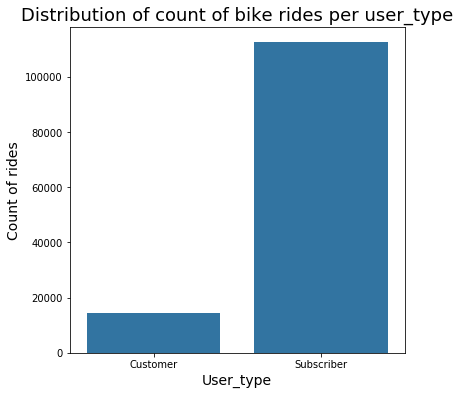

In [13]:
# same distribution in countplot format
plt.figure(figsize=(6,6))
color = sb.color_palette()[0]

sb.countplot(data=ford_bike, x='user_type', color=color)
plt.xlabel('User_type', fontsize=14)
plt.ylabel('Count of rides', fontsize=14)
plt.title('Distribution of count of bike rides per user_type', fontsize=18);

## (Visualization 2)

 ### What is the Duration on a weekday for each Gender?


From the graph, the trip duration start trending up from Wednesdays to Saturdays. Males still have the shortest bike trip.

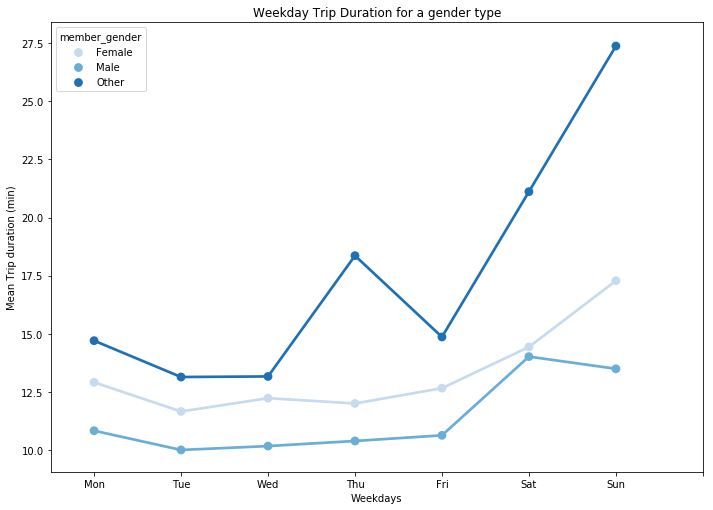

In [11]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=[11.69, 8.27])
sb.pointplot(data = ford_bike, x = 'start_weekday', y = 'duration_min', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Weekday Trip Duration for a gender type')
plt.ylabel('Mean Trip duration (min)')
plt.xlabel('Weekdays')
plt.xticks(np.arange(0, 7 + 1, 1),weekday_labels)
plt.show()

## (Visualization 3)

### Distribution of Bike Trips per hour of the week and day of the week of each user type

For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and day of the week. It is interesting, that Customers tend to use the bike service mostly on Thursday from 5 PM to 6 PM, while Subscribers will likely have a trip from Monday to Friday during rush hours (8-9 AM and 5-6 PM). There are more subscribers on Tuesdays and Thursdays.

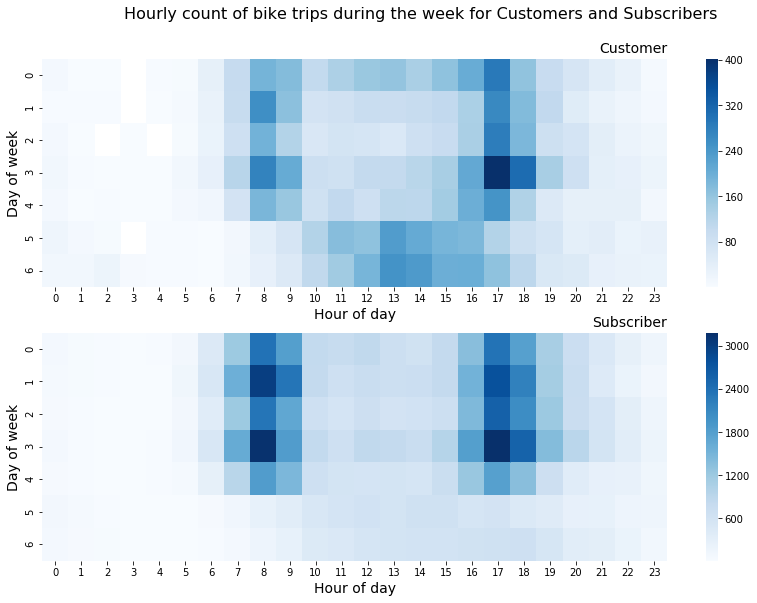

In [12]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = ford_bike.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = ford_bike.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_weekday', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly count of bike trips during the week for Customers and Subscribers', fontsize=16);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 389470 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
